In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.style.use('seaborn-v0_8')
print("Libraries imported successfully!")

Libraries imported successfully!


Dataset shape: (300, 2)
Number of true clusters: 3


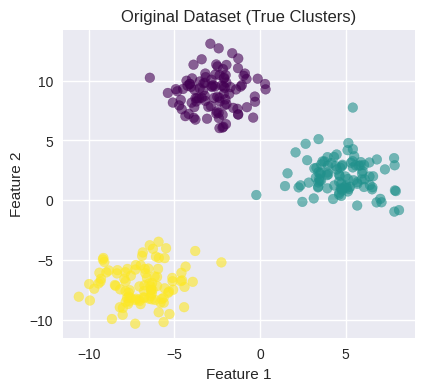

In [2]:
# Create random dataset with 3 clusters
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, 
                       random_state=42, cluster_std=1.5)

# Visualize the original dataset
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('Original Dataset (True Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

print(f"Dataset shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")

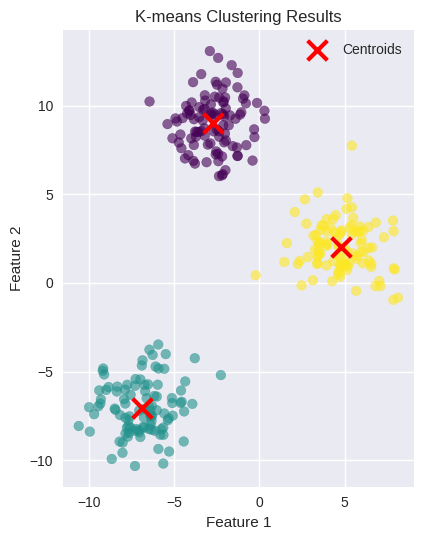

K-means inertia: 1275.43


In [3]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualize K-means results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

print(f"K-means inertia: {kmeans.inertia_:.2f}")

In [4]:
# Create and train neural network using K-means labels
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.2, random_state=42)

# Simple neural network with 2 hidden layers
nn = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# Predictions
y_pred = nn.predict(X_test)
accuracy = nn.score(X_test, y_test)

print(f"Neural Network Accuracy: {accuracy:.3f}")
print(f"Training completed in {nn.n_iter_} iterations")

Neural Network Accuracy: 1.000
Training completed in 236 iterations


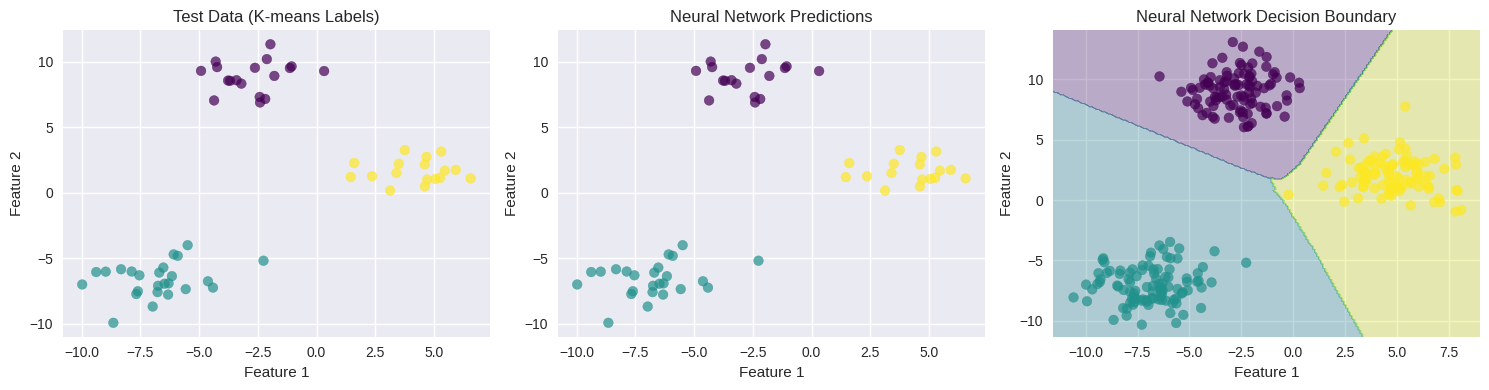

In [5]:
# Visualize neural network results
plt.figure(figsize=(15, 4))

# Plot 1: Test data with true K-means labels
plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title('Test Data (K-means Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: Neural network predictions
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title('Neural Network Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Decision boundary
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
plt.title('Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [6]:
# Summary and evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("=== MODEL SUMMARY ===")
print(f"Dataset size: {X.shape[0]} samples, {X.shape[1]} features")
print(f"K-means clusters: {len(np.unique(y_kmeans))}")
print(f"Neural network architecture: {nn.hidden_layer_sizes}")
print(f"Training accuracy: {nn.score(X_train, y_train):.3f}")
print(f"Test accuracy: {accuracy:.3f}")

print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

=== MODEL SUMMARY ===
Dataset size: 300 samples, 2 features
K-means clusters: 3
Neural network architecture: (10, 5)
Training accuracy: 1.000
Test accuracy: 1.000

=== CONFUSION MATRIX ===
[[18  0  0]
 [ 0 25  0]
 [ 0  0 17]]

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        17

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

